## 3.6 Train the CNN on the Fashion MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from typing import List
from tqdm import tqdm

import torch.nn as nn
import torch.optim as optim

In [ ]:
# Define a data transform to convert the data to PyTorch tensors
transform = transforms.ToTensor()

# ============ FashionMNIST ============
# Load the training and testing datasets
train_dataset_fashion = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset_fashion = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
labels_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels_CIFAR10 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create data loaders to iterate through the datasets
train_loader_fashion = torch.utils.data.DataLoader(train_dataset_fashion, batch_size=len(train_dataset_fashion), shuffle=True)
test_loader_fashion = torch.utils.data.DataLoader(test_dataset_fashion, batch_size=len(test_dataset_fashion), shuffle=False)

# Access the data and labels
X_train_fashion_raw, y_train_fashion_beforeSplit = next(iter(train_loader_fashion))
X_test_fashion_raw, y_test_fashion = next(iter(test_loader_fashion))

100%|██████████| 26421880/26421880 [00:01<00:00, 20523704.74it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 335256.71it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6181326.92it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20603317.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # 16 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 max pooling layer
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 32 output channels, 3x3 kernel
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # 128 units in the first fully connected layer
        self.fc2 = nn.Linear(128, 10)  # 10 classes in Fashion MNIST
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

# Initialize the CNN
cnn = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)  # Learning rate of 0.001

# Train the CNN
num_epochs = 100  # Training for 100 epochs
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train_model(cnn, train_loader_fashion, criterion, optimizer)

# Evaluate the CNN
evaluate_model(cnn, test_loader_fashion)



Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## Improved Version

Epoch 1/100
Training Loss: 0.4861, Validation Loss: 0.3804
Epoch 2/100
Training Loss: 0.3173, Validation Loss: 0.3013
Epoch 3/100
Training Loss: 0.2745, Validation Loss: 0.2951
Epoch 4/100
Training Loss: 0.2467, Validation Loss: 0.2545
Epoch 5/100
Training Loss: 0.2202, Validation Loss: 0.2660
Epoch 6/100
Training Loss: 0.1999, Validation Loss: 0.2507
Epoch 7/100
Training Loss: 0.1848, Validation Loss: 0.2366
Epoch 8/100
Training Loss: 0.1672, Validation Loss: 0.2453
Epoch 9/100
Training Loss: 0.1517, Validation Loss: 0.2583
Epoch 10/100
Training Loss: 0.1366, Validation Loss: 0.2596
Accuracy: 90.56%
Epoch 11/100
Training Loss: 0.1267, Validation Loss: 0.2714
Epoch 12/100
Training Loss: 0.1148, Validation Loss: 0.2660
Epoch 13/100
Training Loss: 0.1015, Validation Loss: 0.2851
Epoch 14/100
Training Loss: 0.0921, Validation Loss: 0.2805
Epoch 15/100
Training Loss: 0.0827, Validation Loss: 0.3012
Epoch 16/100
Training Loss: 0.0742, Validation Loss: 0.3221
Epoch 17/100
Training Loss: 0.06

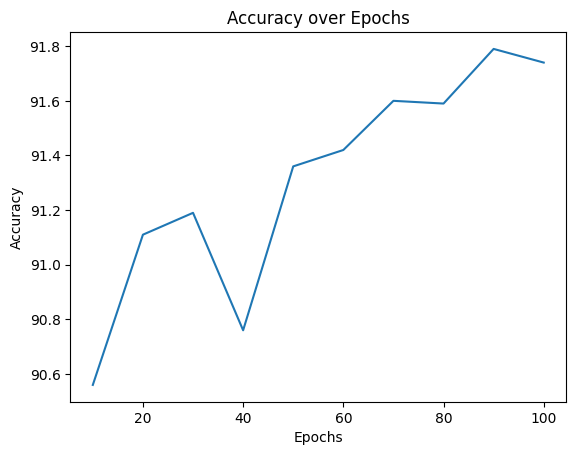

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, train_loader, criterion, optimizer, scheduler):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    scheduler.step(running_loss / len(train_loader.dataset))
    return running_loss / len(train_loader.dataset)

# Loss evaluation function
def evaluate_loss(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    return running_loss / len(loader.dataset)

# Model evaluation function for accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy

# Data loading and transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset_fashion = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset_fashion = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Splitting training data into training and validation sets (10% for validation)
val_size = int(0.1 * len(train_dataset_fashion))
train_size = len(train_dataset_fashion) - val_size
train_dataset, val_dataset = random_split(train_dataset_fashion, [train_size, val_size])

# Creating DataLoaders
batch_size = 64
train_loader_fashion = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_fashion = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_fashion = DataLoader(test_dataset_fashion, batch_size=batch_size, shuffle=False)

# Initialize the CNN
cnn = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

# Train the CNN and track accuracy every 10 epochs
num_epochs = 100
accuracy_per_10_epochs = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train_loss = train_model(cnn, train_loader_fashion, criterion, optimizer, scheduler)
    val_loss = evaluate_loss(cnn, val_loader_fashion, criterion)
    print(f'Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if (epoch + 1) % 10 == 0:
        accuracy = evaluate_model(cnn, test_loader_fashion)
        accuracy_per_10_epochs.append(accuracy)

# Plot the accuracy over epochs
epochs_x = [i for i in range(10, num_epochs + 1, 10)]
plt.plot(epochs_x, accuracy_per_10_epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()


# **Creativity: Experiment impact of varying number of filters (CNN)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 26421880/26421880 [00:01<00:00, 17112281.99it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270183.60it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4963851.63it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 33321415.11it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16, kernel_size=3, stride=1, padding=1):
        super(SimpleCNN, self).__init__()
        self.num_filters = num_filters  # Set num_filters as an instance variable
        self.conv1 = nn.Conv2d(1, self.num_filters, kernel_size, stride=stride, padding=padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.num_filters, 2*self.num_filters, kernel_size, stride=stride, padding=padding)
        self.fc1 = nn.Linear(2*self.num_filters * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 2*self.num_filters * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return 100 * correct / total


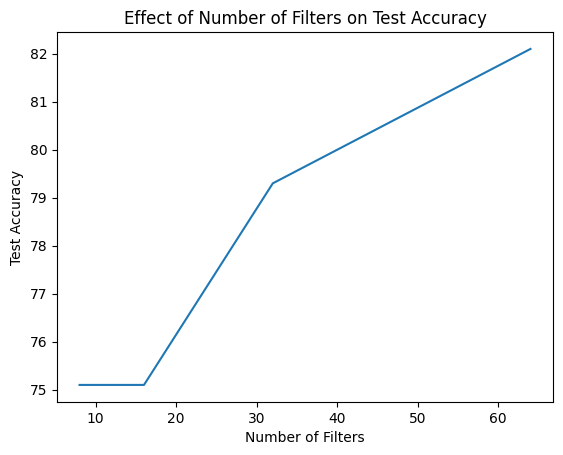

In [ ]:
num_filters = [8, 16, 32, 64]
accuracies = []
for filters in num_filters:
    model = SimpleCNN(num_filters=filters)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer)
    accuracy = evaluate_model(model, test_loader)
    accuracies.append(accuracy)

plt.plot(num_filters, accuracies)
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy')
plt.title('Effect of Number of Filters on Test Accuracy')
plt.show()


# **Creativity: Experiment impact of varying Kernel Size (CNN)**

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16, kernel_size=3, stride=1, padding=1):
        super(SimpleCNN, self).__init__()
        self.num_filters = num_filters
        self.conv1 = nn.Conv2d(1, self.num_filters, kernel_size, stride=stride, padding=padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.num_filters, 2*self.num_filters, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU()

        # Dummy input to calculate the output size after conv and pool layers
        input_size = (1, 28, 28)  # Assuming input images are 28x28
        dummy_input = torch.zeros(1, *input_size)
        output_size = self.forward_features(dummy_input).view(-1).shape[0]

        self.fc1 = nn.Linear(output_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward_features(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return 100 * correct / total

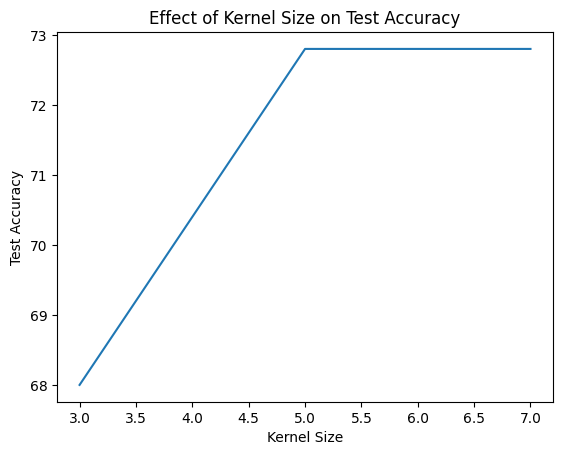

In [ ]:
kernel_sizes = [3, 5, 7]
accuracies = []
for kernel_size in kernel_sizes:
    model = SimpleCNN(kernel_size=kernel_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer, epochs=5)
    accuracy = evaluate_model(model, test_loader)
    accuracies.append(accuracy)

plt.plot(kernel_sizes, accuracies)
plt.xlabel('Kernel Size')
plt.ylabel('Test Accuracy')
plt.title('Effect of Kernel Size on Test Accuracy')
plt.show()


# **Creativity: Experiment impact of varying Stride (CNN)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16, kernel_size=3, stride=1, padding=1):
        super(SimpleCNN, self).__init__()
        self.num_filters = num_filters
        self.stride = stride
        self.conv1 = nn.Conv2d(1, self.num_filters, kernel_size, stride=self.stride, padding=padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.num_filters, 2*self.num_filters, kernel_size, stride=self.stride, padding=padding)
        self.relu = nn.ReLU()

        # Dummy input to calculate the output size after conv and pool layers
        input_size = (1, 28, 28)  # Assuming input images are 28x28
        dummy_input = torch.zeros(1, *input_size)
        output_size = self.forward_features(dummy_input).view(-1).shape[0]

        self.fc1 = nn.Linear(output_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward_features(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return 100 * correct / total

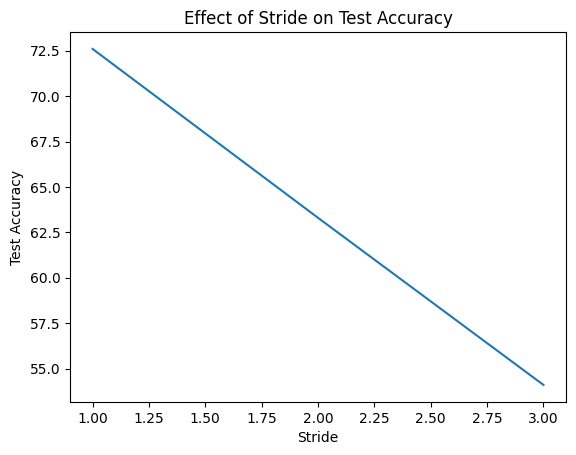

In [ ]:
# Ensure train_loader and test_loader are defined before running this code

strides = [1, 2, 3]
accuracies = []
for stride in strides:
    model = SimpleCNN(stride=stride)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer, epochs=5)
    accuracy = evaluate_model(model, test_loader)
    accuracies.append(accuracy)

plt.plot(strides, accuracies)
plt.xlabel('Stride')
plt.ylabel('Test Accuracy')
plt.title('Effect of Stride on Test Accuracy')
plt.show()


# **Creativity: Experiment impact of varying padding (CNN)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16, kernel_size=3, stride=1, padding=1):
        super(SimpleCNN, self).__init__()
        self.num_filters = num_filters
        self.stride = stride
        self.padding = padding
        self.conv1 = nn.Conv2d(1, self.num_filters, kernel_size, stride=self.stride, padding=self.padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.num_filters, 2*self.num_filters, kernel_size, stride=self.stride, padding=self.padding)
        self.relu = nn.ReLU()

        # Dummy input to calculate the output size after conv and pool layers
        input_size = (1, 28, 28)  # Assuming input images are 28x28
        dummy_input = torch.zeros(1, *input_size)
        output_size = self.forward_features(dummy_input).view(-1).shape[0]

        self.fc1 = nn.Linear(output_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward_features(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return 100 * correct / total

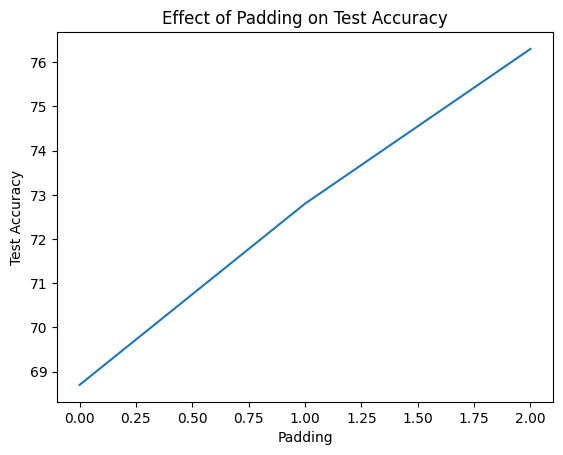

In [ ]:
# Ensure train_loader and test_loader are defined before running this code

paddings = [0, 1, 2]
accuracies = []
for padding in paddings:
    model = SimpleCNN(padding=padding)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer, epochs=5)
    accuracy = evaluate_model(model, test_loader)
    accuracies.append(accuracy)

plt.plot(paddings, accuracies)
plt.xlabel('Padding')
plt.ylabel('Test Accuracy')
plt.title('Effect of Padding on Test Accuracy')
plt.show()


# **Creativity: Training CNN with 10^k, k element of {0,1,2,3,4} images and plotting the test accuracy**

100%|██████████| 9912422/9912422 [00:00<00:00, 105526930.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38565964.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24754425.50it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17477549.33it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



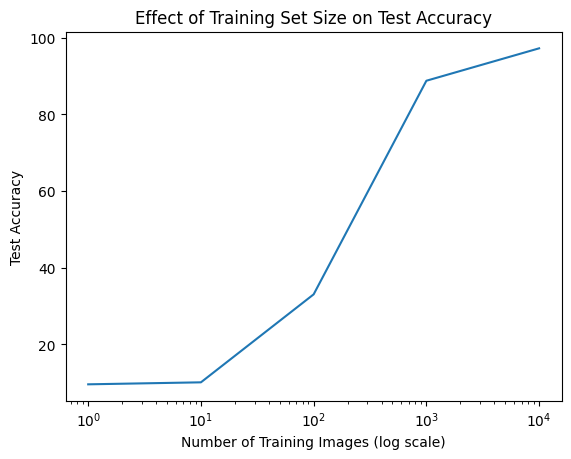

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import numpy as np

class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16, kernel_size=3, stride=1, padding=1):
        super(SimpleCNN, self).__init__()
        self.num_filters = num_filters
        self.stride = stride
        self.padding = padding
        self.conv1 = nn.Conv2d(1, self.num_filters, kernel_size, stride=self.stride, padding=self.padding)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.num_filters, 2*self.num_filters, kernel_size, stride=self.stride, padding=self.padding)
        self.relu = nn.ReLU()

        # Dummy input to calculate the output size after conv and pool layers
        input_size = (1, 28, 28)  # Assuming input images are 28x28
        dummy_input = torch.zeros(1, *input_size)
        output_size = self.forward_features(dummy_input).view(-1).shape[0]

        self.fc1 = nn.Linear(output_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward_features(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return 100 * correct / total

# Loading the Dataset
def load_data(num_images):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    indices = np.arange(len(train_dataset))
    np.random.shuffle(indices)
    indices = indices[:num_images]
    subset_train_dataset = Subset(train_dataset, indices)

    train_loader = DataLoader(dataset=subset_train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)
    return train_loader, test_loader

# Experiment
num_images = [10**k for k in range(5)]
accuracies = []

for images in num_images:
    train_loader, test_loader = load_data(num_images=images)
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer, epochs=5)
    accuracy = evaluate_model(model, test_loader)
    accuracies.append(accuracy)

# Plotting the Results
plt.plot(num_images, accuracies)
plt.xscale('log')
plt.xlabel('Number of Training Images (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Set Size on Test Accuracy')
plt.show()
